# FIAP - Pós Tech IA para Devs
## Desafio Aula Inagural : Previsão de evasão escolar
### Professora: Poliana Ferreira
Atividade prática de classificação, cujo objetivo é desenvolver um modelo capazes de identificar se um aluno tem maior chance de abandonar os estudos (Dropout) ou de se formar (Graduate). Você deve ter acurácia >= 90% e recall do dropout >=e 80%

Vocês devem seguir os passos nos comentários desse notebook. Lembrem-se, vocês podem adicionar coisas, mas não podem tirar! :)

Base de dados: https://github.com/pnferreira/fiap-ia-devs/blob/main/dropout-inaugural.csv

Target: "Dropout" ou "Graduate"


In [2]:
# importar as bibliotecas necessárias - pandas, sklearn, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
import requests as req
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier


In [3]:
# importar a base de dados
url = 'https://raw.githubusercontent.com/pnferreira/fiap-ia-devs/main/dropout-inaugural.csv'

# Fazendo a requisição
response = req.get(url)

if response.status_code == 200:
    with open('dropout-inaugural.csv', 'wb') as f:
        f.write(response.content)
    print("Arquivo baixado com sucesso!")


Arquivo baixado com sucesso!


In [4]:
# visualizar as primeiras linhas da base de dados
df = pd.read_csv('dropout-inaugural.csv')
print("Primeiras linhas da base de dados:")
df.head()

Primeiras linhas da base de dados:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8,5,2.0,1,1,1,13.0,10.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,6,1,11.0,1,1,1,1.0,3.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,5.0,1,1,1,22.0,27.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,8,2,15.0,1,1,1,23.0,27.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,12,1,3.0,0,1,1,22.0,28.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# visualizar as informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   float64
 1   Application mode                                3635 non-null   int64  
 2   Application order                               3635 non-null   int64  
 3   Course                                          3629 non-null   float64
 4   Daytime/evening attendance                      3635 non-null   int64  
 5   Previous qualification                          3635 non-null   int64  
 6   Nacionality                                     3635 non-null   int64  
 7   Mother's qualification                          3632 non-null   float64
 8   Father's qualification                          3628 non-null   float64
 9   Mother's occupation                      

In [ ]:
# ver os valores da coluna Target - que queremos prever
print(df["Target"].unique())


['Dropout' 'Graduate']


In [7]:
# tratar dados nulos
df = df.dropna()
# tratar dados duplicados
df = df.drop_duplicates()
# outras formas de pré-processamento (OPCIONAL - ex.: seleção de características, normalização, tratamento de outliers, balanceamento do target...)
X = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} linhas")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")

# pode ser nessa célula ou nas seguintes, a depender do que você escolher fazer


Tamanho do conjunto de treino: 2527 linhas
Tamanho do conjunto de teste: 1083 linhas


<Figure size 1200x600 with 0 Axes>

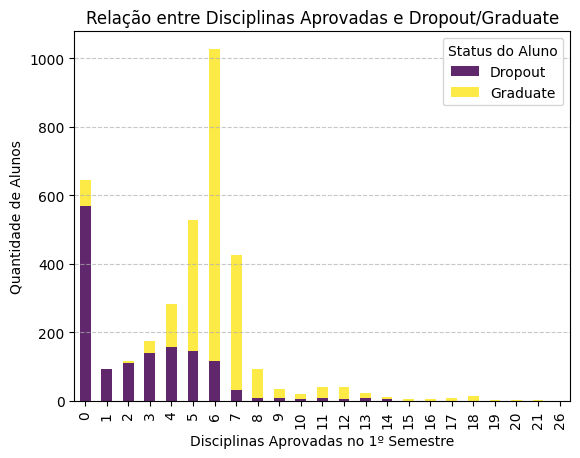

In [10]:
# análise exploratória: crie uma pergunta sobre a base de dados e responda através de um gráfico
data_grouped = df.groupby(["Curricular units 1st sem (approved)", "Target"]).size().unstack()

plt.figure(figsize=(12, 6))
data_grouped.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)

# Personalizar o gráfico
plt.xlabel("Disciplinas Aprovadas no 1º Semestre")
plt.ylabel("Quantidade de Alunos")
plt.title("Relação entre Disciplinas Aprovadas e Dropout/Graduate")
plt.legend(title="Status do Aluno")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

In [11]:
# divisão entre caracterísiticas (X) e rótulo (y)
X = df.drop(columns=['Target', 'Dropout'])
y = df['Target']

# divisão entre treino e teste - 70% e 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} linhas")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")

Tamanho do conjunto de treino: 2527 linhas
Tamanho do conjunto de teste: 1083 linhas


In [12]:
# treinamento de modelo de classificação a sua escolha (um ou mais)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg, pos_label='Dropout')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Dropout')

# Exibir resultados
print(f'Acurácia do modelo Logística: {accuracy_logreg * 100:.2f}%')
print(f'Recall (Dropout) do modelo Logística: {recall_logreg * 100:.2f}%')

print(f'Acurácia do modelo Random Forest: {accuracy_rf * 100:.2f}%')
print(f'Recall (Dropout) do modelo Random Forest: {recall_rf * 100:.2f}%')

Acurácia do modelo Logística: 90.58%
Recall (Dropout) do modelo Logística: 83.80%
Acurácia do modelo Random Forest: 89.84%
Recall (Dropout) do modelo Random Forest: 80.52%


In [13]:
# avaliação do modelo com dados de teste
#(para ser considerado resultado satisfatório, você deve alcançar no mínimo 90% de acurácia e 80% de recall do Dropout)
if accuracy_logreg >= 0.90 and recall_logreg >= 0.80:
    print("O modelo Logística atendeu aos critérios de desempenho!")
else:
    print("O modelo Logística NÃO atendeu aos critérios de desempenho.")

if accuracy_rf >= 0.90 and recall_rf >= 0.80:
    print("O modelo Random Forest atendeu aos critérios de desempenho!")
else:
    print("O modelo Random Forest NÃO atendeu aos critérios de desempenho.")

O modelo Logística atendeu aos critérios de desempenho!
O modelo Random Forest NÃO atendeu aos critérios de desempenho.
